In [2]:
# Import pandas and matplolib
# Renaming pandas to pd
import pandas as pd
# Make graphs
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
path = 'Beichen_Form.csv'
# popular naming convention - variables that area DataFrames end in _df
df = pd.read_csv(path)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,Timestamp,imagine_future,today_compare_future_imagined,daydream_imagine,create_worlds_mind,stories_books_movies,tired_relax_way,movies_books_as_escape,afraid_growing_up
0,2024/10/17 1:56:44 pm CET,5,Completely different,4,"Yes, frequently",Mystery,Sleep,"Yes, definitely",No
1,2024/10/17 2:04:04 pm CET,4,Completely different,5,"Yes, frequently",Horror,Play games,"Yes, definitely",Yes
2,2024/10/17 2:04:26 pm CET,4,Somewhat similar,4,"Yes, sometimes",Science Fiction,Sleep,Sometimes,No
3,2024/10/17 2:06:04 pm CET,5,Somewhat similar,5,"Yes, frequently",Fantasy,Watch TV,"Yes, definitely",Yes
4,2024/10/17 2:06:28 pm CET,4,Somewhat similar,4,"Yes, sometimes",Science Fiction,Sleep,"Yes, definitely",Yes


In [6]:
display(df)

,Timestamp,imagine_future,today_compare_future_imagined,daydream_imagine,create_worlds_mind,stories_books_movies,tired_relax_way,movies_books_as_escape,afraid_growing_up
0,2024/10/17 1:56:44 pm CET,5,Completely different,4,"Yes, frequently",Mystery,Sleep,"Yes, definitely",No
1,2024/10/17 2:04:04 pm CET,4,Completely different,5,"Yes, frequently",Horror,Play games,"Yes, definitely",Yes
2,2024/10/17 2:04:26 pm CET,4,Somewhat similar,4,"Yes, sometimes",Science Fiction,Sleep,Sometimes,No
3,2024/10/17 2:06:04 pm CET,5,Somewhat similar,5,"Yes, frequently",Fantasy,Watch TV,"Yes, definitely",Yes
4,2024/10/17 2:06:28 pm CET,4,Somewhat similar,4,"Yes, sometimes",Science Fiction,Sleep,"Yes, definitely",Yes
5,2024/10/17 2:06:31 pm CET,5,Completely different,4,"Yes, sometimes",Romance,Watch TV,Sometimes,Yes
6,2024/10/17 2:06:59 pm CET,5,Completely different,5,"Yes, frequently",Historical,Sleep,"Yes, definitely",No
7,2024/10/17 2:07:55 pm CET,4,Somewhat similar,5,"Yes, sometimes",Slice of Life or Magical Realism,Go to the cinema alone,"Yes, definitely",Yes
8,2024/10/17 2:10:29 pm CET,2,Somewhat similar,5,"Yes, frequently",Fantasy,Sleep,Sometimes,Yes
9,2024/10/17 2:11:40 pm CET,3,Completely different,4,"Yes, sometimes",Fantasy,Watch TV,"Yes, definitely",Yes


<function matplotlib.pyplot.show(close=None, block=None)>

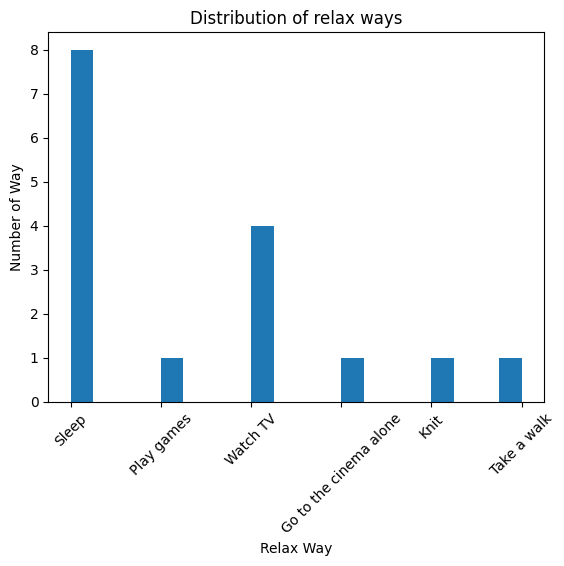

In [7]:
plt.hist(df.tired_relax_way, bins=20)
plt.xlabel('Relax Way')
plt.ylabel('Number of Way')
plt.title('Distribution of relax ways')
plt.xticks(rotation=45)
plt.show

In [ ]:
# Create a line plot for 'imagine_future' and 'movies_books_as_escape' using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['imagine_future'], df['movies_books_as_escape'], marker='o', linestyle='-', color='r')
plt.title('Relationship between Imagine Future and Movies/Books as Escape')
plt.xlabel('Imagine Future')
plt.ylabel('Movies/Books as Escape')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the correlation coefficient
correlation = df['imagine_future'].corr(df['movies_books_as_escape'])
print(f"\
Correlation coefficient between Imagine Future and Movies/Books as Escape: {correlation:.3f}")

In [8]:
type_groupings = df.groupby('today_compare_future_imagined')
type_groupings.daydream_imagine.median()

today_compare_future_imagined
Better                         4.0
Better;Completely different    3.0
Completely different           4.0
Not sure                       5.0
Somewhat similar               5.0
Name: daydream_imagine, dtype: float64

In [9]:
type_groupings.daydream_imagine.describe()

,count,mean,std,min,25%,50%,75%,max
today_compare_future_imagined,,,,,,,,
Better,1.0,4.000000,NaN,4.0,4.00,4.0,4.0,4.0
Better;Completely different,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Completely different,7.0,4.285714,0.755929,3.0,4.00,4.0,5.0,5.0
Not sure,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Somewhat similar,6.0,4.666667,0.516398,4.0,4.25,5.0,5.0,5.0


Text(0, 0.5, 'Number')

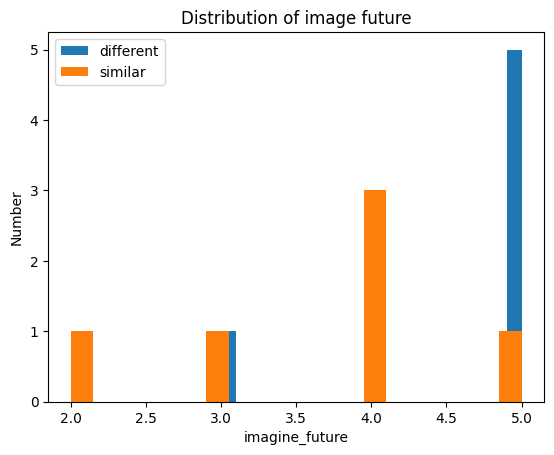

In [10]:
different_df = type_groupings.get_group('Completely different')
# make a dataframe of just fire pokemon
similar_df = type_groupings.get_group('Somewhat similar')
plt.hist(different_df.imagine_future, bins=20, label='different')
plt.hist(similar_df.imagine_future, bins=20, label='similar')
plt.legend()
plt.title("Distribution of image future")
plt.xlabel("imagine_future")
plt.ylabel("Number")

<Axes: >

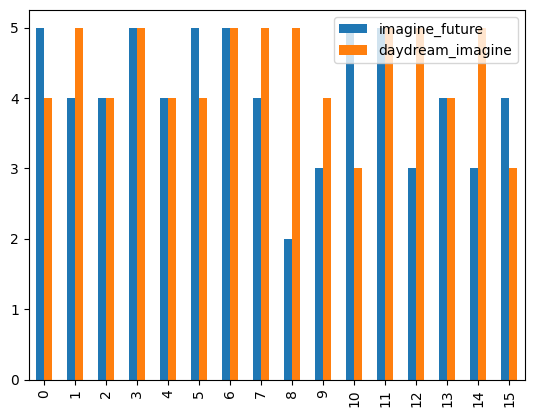

In [11]:
df.plot.bar()

<Axes: >

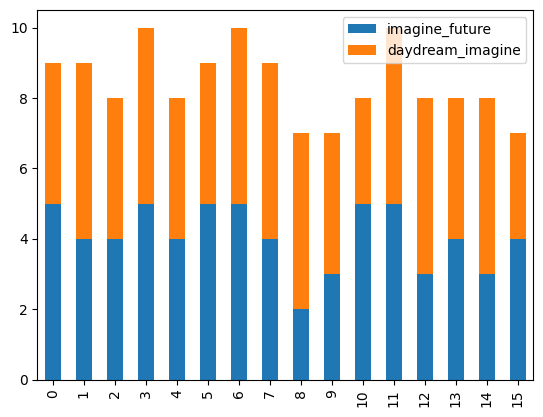

In [12]:
df.plot.bar(stacked=True)

<Axes: >

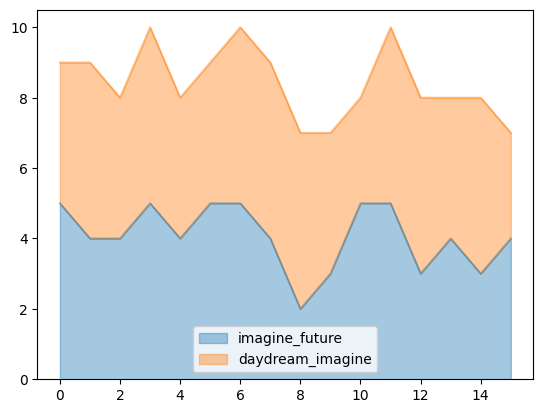

In [13]:
df.plot.area(alpha=0.4)

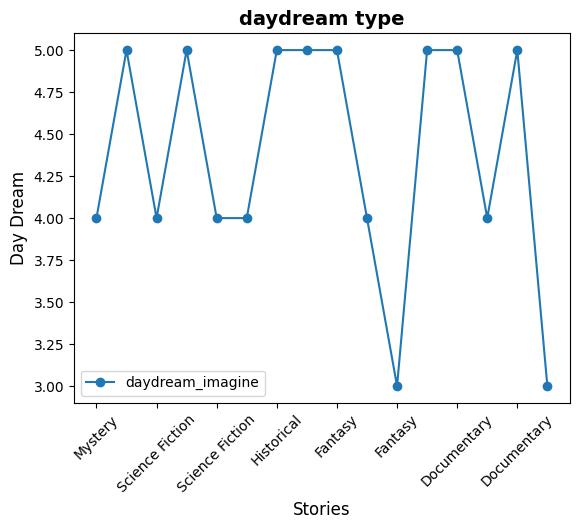

In [31]:
ax = df.plot(x='stories_books_movies', y='daydream_imagine', kind='line', title='daydream type', legend=True, marker='o')

# Adding title and axis labels
ax.set_title('daydream type', fontsize=14, fontweight='bold')
ax.set_xlabel('Stories', fontsize=12)
ax.set_ylabel('Day Dream', fontsize=12)
plt.xticks(rotation=45)
plt.show()

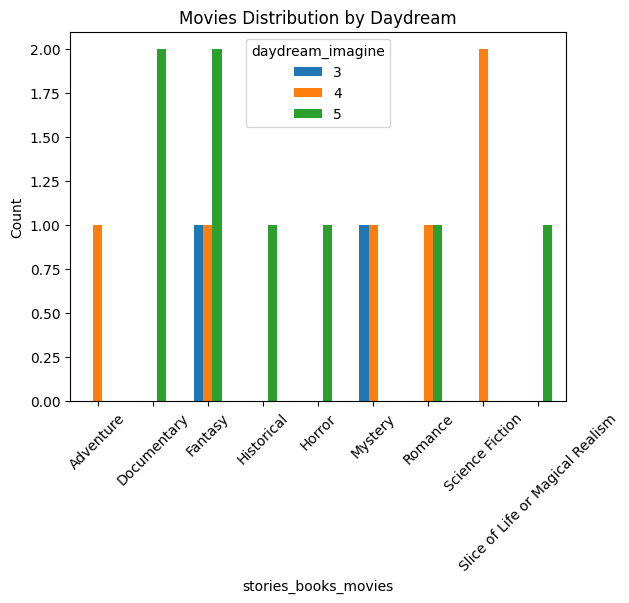

In [34]:
stories_counts = df.groupby(['stories_books_movies', 'daydream_imagine']).size().unstack(fill_value=0)
stories_counts.plot(kind='bar', stacked=False)
plt.title('Movies Distribution by Daydream')
plt.xlabel('stories_books_movies')
plt.ylabel('Count')
plt.legend(title='daydream_imagine')
plt.xticks(rotation=45)
plt.show()

In [15]:
# imagine_future	today_compare_future_imagined
imagine_people = df[[p for p in df.imagine_future>3]]
imagine_people.today_compare_future_imagined

0            Completely different
1            Completely different
2                Somewhat similar
3                Somewhat similar
4                Somewhat similar
5            Completely different
6            Completely different
7                Somewhat similar
10           Completely different
11           Completely different
13                         Better
15    Better;Completely different
Name: today_compare_future_imagined, dtype: object

In [16]:
non_imagine_people = df[[p for p in df.imagine_future<=3]]
non_imagine_people.today_compare_future_imagined

8         Somewhat similar
9     Completely different
12        Somewhat similar
14                Not sure
Name: today_compare_future_imagined, dtype: object

In [16]:
# Create cross-tabulations for categorical variables to explore their relationships
categorical_columns = ['today_compare_future_imagined', 'create_worlds_mind', 'stories_books_movies', 
                       'tired_relax_way', 'movies_books_as_escape', 'afraid_growing_up']

# Generate cross-tabulation between 'create_worlds_mind' and 'stories_books_movies'
cross_tab_worlds_stories = pd.crosstab(df['create_worlds_mind'], df['stories_books_movies'])

# Generate cross-tabulation between 'afraid_growing_up' and 'movies_books_as_escape'
cross_tab_afraid_escape = pd.crosstab(df['afraid_growing_up'], df['movies_books_as_escape'])

# Display the cross-tabulations
cross_tab_worlds_stories, cross_tab_afraid_escape

(stories_books_movies  Adventure  Documentary  Fantasy  Historical  Horror  \
 create_worlds_mind                                                          
 Yes, frequently               1            2        3           1       1   
 Yes, sometimes                0            0        1           0       0   
 
 stories_books_movies  Mystery  Romance  Science Fiction  \
 create_worlds_mind                                        
 Yes, frequently             2        1                0   
 Yes, sometimes              0        1                2   
 
 stories_books_movies  Slice of Life or Magical Realism  
 create_worlds_mind                                      
 Yes, frequently                                      0  
 Yes, sometimes                                       1  ,
 movies_books_as_escape  Sometimes  Yes, definitely
 afraid_growing_up                                 
 No                              2                4
 Yes                             3                7)

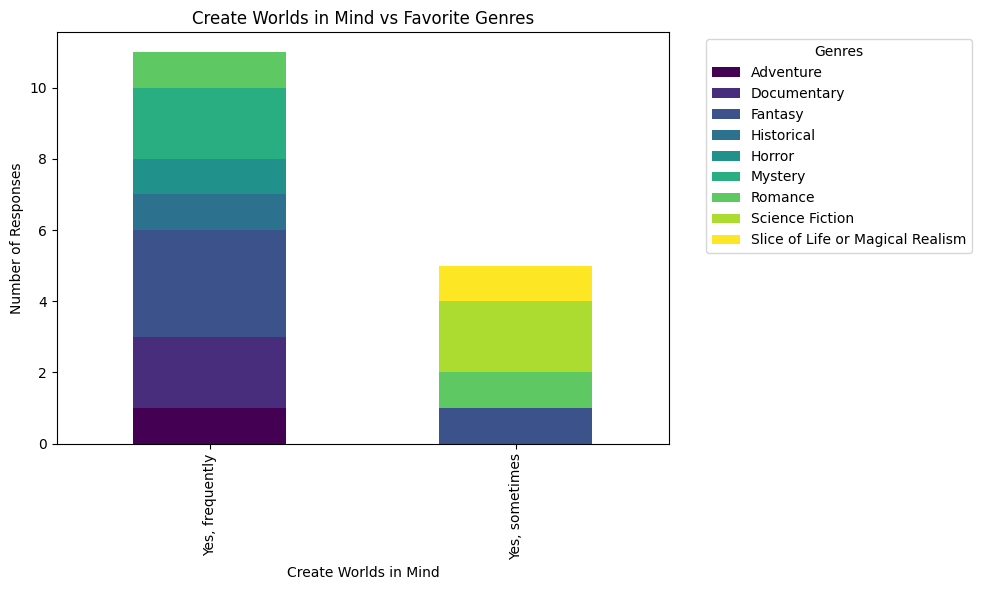

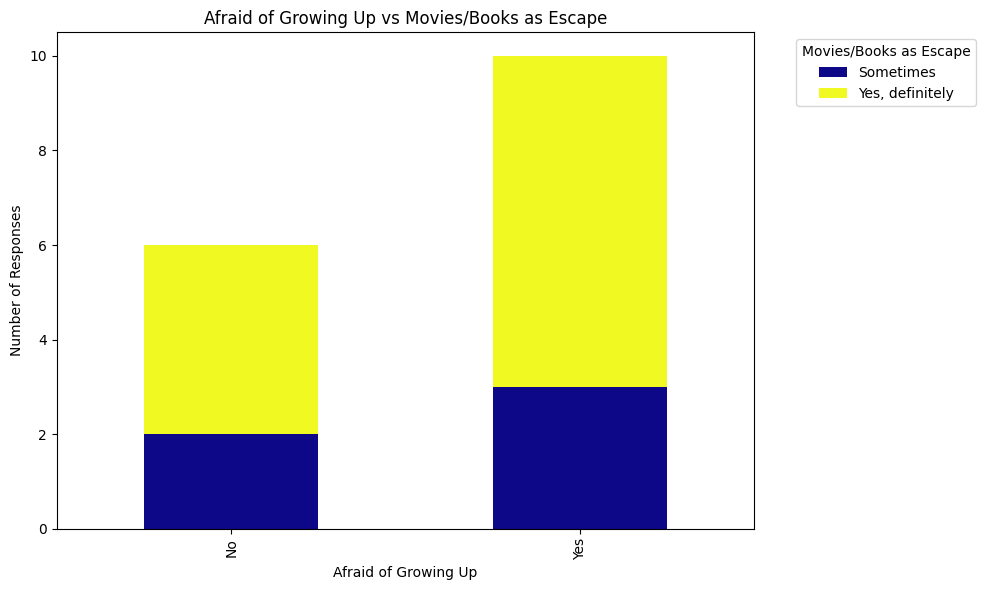

In [20]:
# Plotting the relationship between 'create_worlds_mind' and 'stories_books_movies' (favorite genres)
cross_tab_worlds_stories.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis', title='Create Worlds in Mind vs Favorite Genres')
plt.xlabel('Create Worlds in Mind')
plt.ylabel('Number of Responses')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the relationship between 'afraid_growing_up' and 'movies_books_as_escape'
cross_tab_afraid_escape.plot(kind='bar', stacked=True, figsize=(10,6), colormap='plasma', title='Afraid of Growing Up vs Movies/Books as Escape')
plt.xlabel('Afraid of Growing Up')
plt.ylabel('Number of Responses')
plt.legend(title='Movies/Books as Escape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

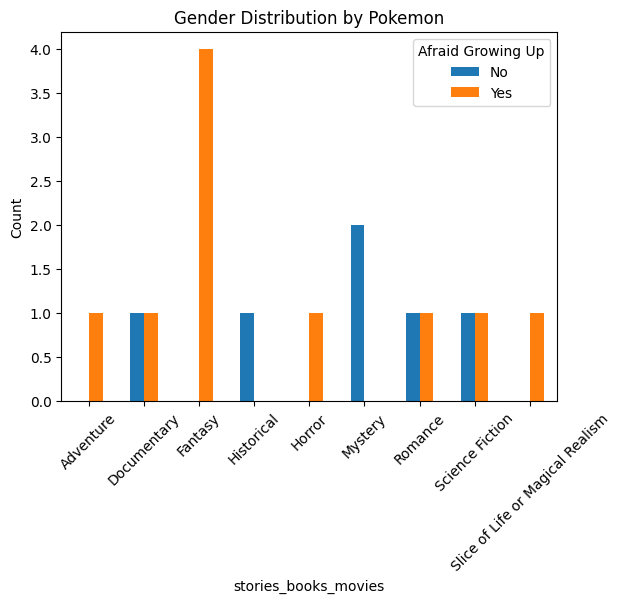

In [23]:
stories_counts = df.groupby(['stories_books_movies', 'afraid_growing_up']).size().unstack(fill_value=0)
stories_counts.plot(kind='bar', stacked=False)
plt.title('Gender Distribution by Pokemon')
plt.xlabel('stories_books_movies')
plt.ylabel('Count')
plt.legend(title='Afraid Growing Up')
plt.xticks(rotation=45)
plt.show()

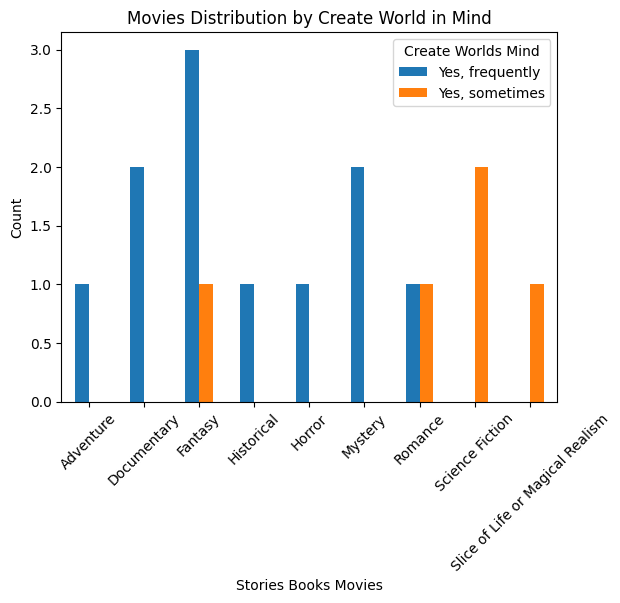

In [27]:
stories_counts = df.groupby(['stories_books_movies', 'create_worlds_mind']).size().unstack(fill_value=0)
stories_counts.plot(kind='bar', stacked=False)
plt.title('Movies Distribution by Create World in Mind')
plt.xlabel('Stories Books Movies')
plt.ylabel('Count')
plt.legend(title='Create Worlds Mind')
plt.xticks(rotation=45)
plt.show()

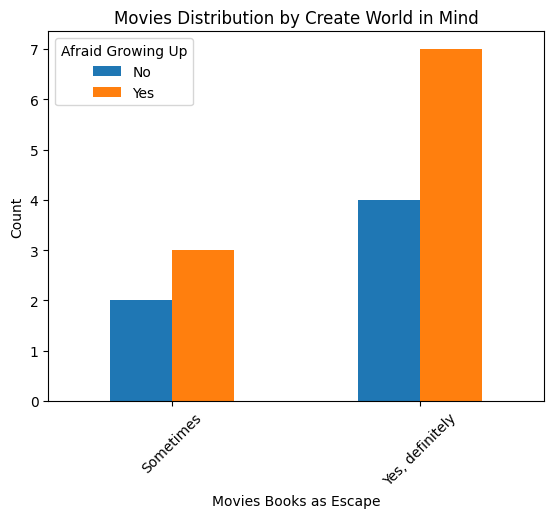

In [30]:
stories_counts = df.groupby(['movies_books_as_escape', 'afraid_growing_up']).size().unstack(fill_value=0)
stories_counts.plot(kind='bar', stacked=False)
plt.title('Movies Distribution by Create World in Mind')
plt.xlabel('Movies Books as Escape')
plt.ylabel('Count')
plt.legend(title='Afraid Growing Up')
plt.xticks(rotation=45)
plt.show()

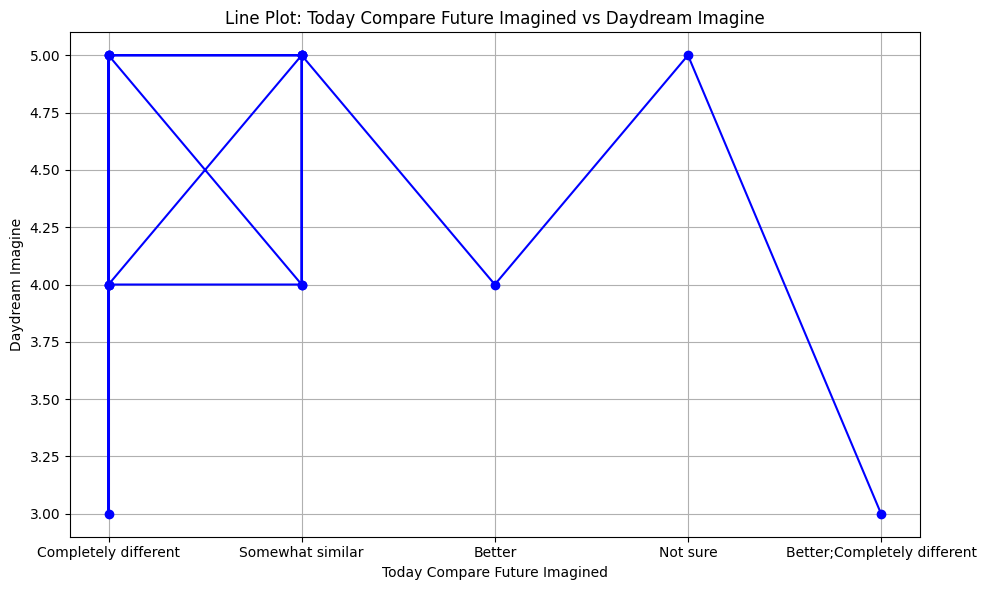

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(df['today_compare_future_imagined'], df['daydream_imagine'], marker='o', linestyle='-', color='b')
plt.title('Line Plot: Today Compare Future Imagined vs Daydream Imagine')
plt.xlabel('Today Compare Future Imagined')
plt.ylabel('Daydream Imagine')
plt.grid(True)
plt.tight_layout()
plt.show()

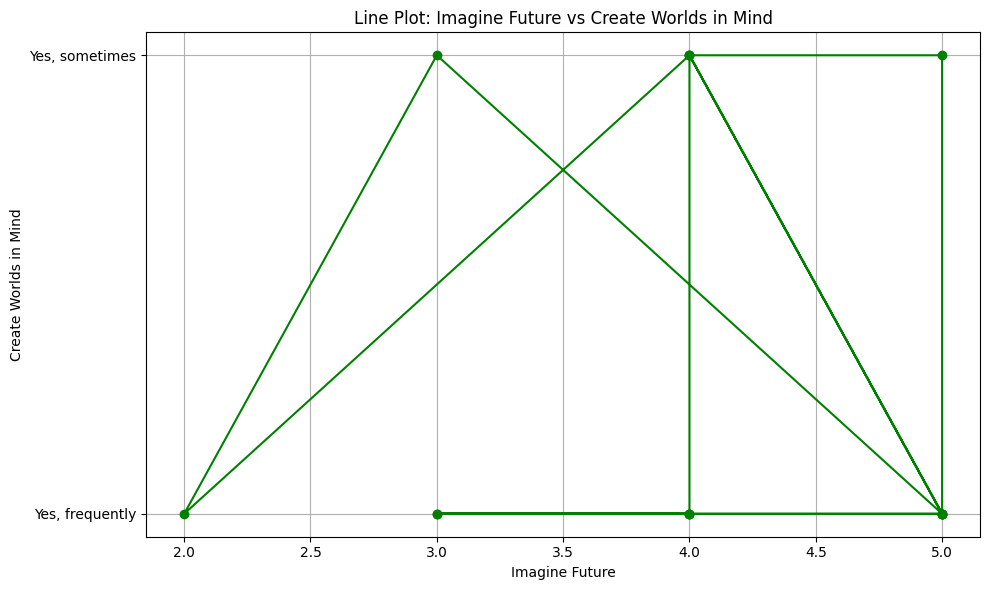

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df['imagine_future'], df['create_worlds_mind'], marker='o', linestyle='-', color='g')
plt.title('Line Plot: Imagine Future vs Create Worlds in Mind')
plt.xlabel('Imagine Future')
plt.ylabel('Create Worlds in Mind')
plt.grid(True)
plt.tight_layout()
plt.show()